In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Se cargan las diferentes dependencias necesarias
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Conv2D, Flatten, MaxPooling1D, MaxPooling2D

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl

from IPython import display

In [ ]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
   # sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
   # wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

(32000,)


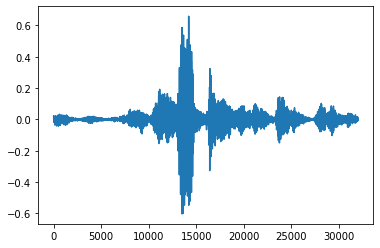

In [ ]:
# Ejemplo de carga de un archivo
RutaFile="/content/gdrive/MyDrive/Datos_Secuenciales/audios/gato.318df297.wav"
wave = load_wav_16k_mono(RutaFile)
print(wave.shape)
plt.plot(wave)
plt.show()



In [ ]:
def preprocess(wave): 
    wav = wave[:32000]
    #zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
   # wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=255, frame_step=128)
    spectrogram = tf.abs(spectrogram)
    return spectrogram

In [ ]:
espectrograma= preprocess(wave)
print('Waveform shape:', wave.shape)
print('Spectrogram shape:', espectrograma.shape)
print('Audio playback')
display.display(display.Audio(wave, rate=16000))

Waveform shape: (32000,)
Spectrogram shape: (249, 129)
Audio playback


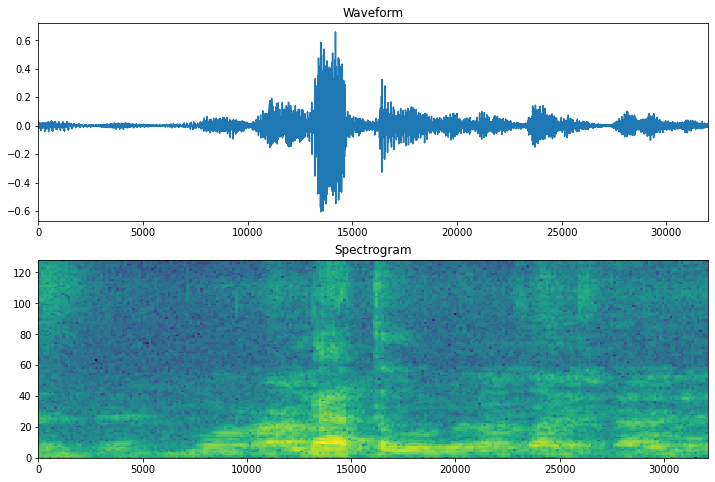

In [ ]:
def plot_spectrogram(espectrograma, ax):
  # Convert to frequencies to log scale and transpose so that the time is
  # represented in the x-axis (columns).
  log_spec = np.log(espectrograma.T)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(espectrograma), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)


fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(wave.shape[0])
axes[0].plot(timescale, wave.numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, 32000])
plot_spectrogram(espectrograma.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.show()

In [ ]:
# Load  dataset

RutaFile="/content/gdrive/MyDrive/Datos_Secuenciales/audios/gato.318df297.wav"
wave1a = load_wav_16k_mono(RutaFile)
espectrograma1a= preprocess(wave1a)

RutaFile="/content/gdrive/MyDrive/Datos_Secuenciales/audios/gato.318dgofm.wav"
wave1b = load_wav_16k_mono(RutaFile)
espectrograma1b= preprocess(wave1b)

RutaFile="/content/gdrive/MyDrive/Datos_Secuenciales/audios/gato.318dgv1j.wav"
wave1c = load_wav_16k_mono(RutaFile)
espectrograma1c= preprocess(wave1c)

RutaFile="/content/gdrive/MyDrive/Datos_Secuenciales/audios/gato.318dh50p.wav"
wave1d = load_wav_16k_mono(RutaFile)
espectrograma1d= preprocess(wave1d)

RutaFile="/content/gdrive/MyDrive/Datos_Secuenciales/audios/pato.318dkmi6.wav"
wave2a = load_wav_16k_mono(RutaFile)
espectrograma2a= preprocess(wave2a)

RutaFile="/content/gdrive/MyDrive/Datos_Secuenciales/audios/pato.318dkqg5.wav"
wave2b = load_wav_16k_mono(RutaFile)
espectrograma2b= preprocess(wave2b)

RutaFile="/content/gdrive/MyDrive/Datos_Secuenciales/audios/pato.318dku1b.wav"
wave2c = load_wav_16k_mono(RutaFile)
espectrograma2c= preprocess(wave2c)

RutaFile="/content/gdrive/MyDrive/Datos_Secuenciales/audios/pato.318dl1h1.wav"
wave2d = load_wav_16k_mono(RutaFile)
espectrograma2d= preprocess(wave2d)

RutaFile="/content/gdrive/MyDrive/Datos_Secuenciales/audios/perro.318db8h2.wav"
wave3a = load_wav_16k_mono(RutaFile)
espectrograma3a= preprocess(wave3a)

RutaFile="/content/gdrive/MyDrive/Datos_Secuenciales/audios/perro.318dbn8u.wav"
wave3b = load_wav_16k_mono(RutaFile)
espectrograma3b= preprocess(wave3b)

RutaFile="/content/gdrive/MyDrive/Datos_Secuenciales/audios/perro.318dbusm.wav"
wave3c = load_wav_16k_mono(RutaFile)
espectrograma3c= preprocess(wave3c)

RutaFile="/content/gdrive/MyDrive/Datos_Secuenciales/audios/perro.318dc7dl.wav"
wave3d = load_wav_16k_mono(RutaFile)
espectrograma3d= preprocess(wave3d)

Datos=np.zeros((12,249,129))
Datos[0,:,:]=espectrograma1a
Datos[1,:,:]=espectrograma1b
Datos[2,:,:]=espectrograma1c
Datos[3,:,:]=espectrograma1d
Datos[4,:,:]=espectrograma2a
Datos[5,:,:]=espectrograma2b
Datos[6,:,:]=espectrograma2c
Datos[7,:,:]=espectrograma2d
Datos[8,:,:]=espectrograma3a
Datos[9,:,:]=espectrograma3b
Datos[10,:,:]=espectrograma3c
Datos[11,:,:]=espectrograma3d

print(Datos.shape)
Xtrain=tf.expand_dims(Datos, axis=3)
print(Xtrain.shape)

(12, 249, 129)
(12, 249, 129, 1)


In [ ]:
YtrainIni=np.zeros((12,1))
for i in range(4):
    YtrainIni[i]=0

for i in range(4,8):
    YtrainIni[i]=1

for i in range(8,12):
    YtrainIni[i]=2

print(YtrainIni)

[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]]


In [ ]:
Ytrain= to_categorical(YtrainIni)
print(Ytrain)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 249, 16)           6208      
                                                                 
 conv1d_7 (Conv1D)           (None, 249, 32)           1568      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 125, 32)          0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4000)              0         
                                                                 
 dense_2 (Dense)             (None, 3)                 12003     
                                                                 
Total params: 19,779
Trainable params: 19,779
Non-trainable params: 0
__________________________________________________

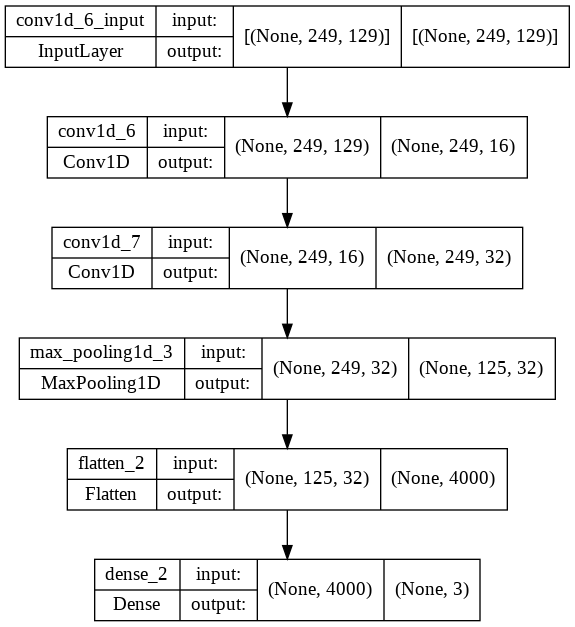

In [ ]:

#Definición del modelo
modelo = Sequential()

modelo.add(Conv1D(16,3, activation="relu",padding="same",input_shape=(249,129)))
modelo.add(Conv1D(32, 3, activation="relu",padding="same"))
modelo.add(MaxPooling1D(pool_size=2,strides=2, padding='same'))
modelo.add(Flatten())
modelo.add(Dense(3, activation = 'softmax'))
modelo.summary()

keras.utils.plot_model(modelo, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = modelo.fit(Xtrain,Ytrain, epochs=100,batch_size=None)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.3097 - accuracy: 0.4167
Epoch 2/100
1/1 [==============================] - 0s 43ms/step - loss: 0.8884 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 42ms/step - loss: 0.7220 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 36ms/step - loss: 0.5615 - accuracy: 0.8333
Epoch 5/100
1/1 [==============================] - 0s 39ms/step - loss: 0.4312 - accuracy: 0.8333
Epoch 6/100
1/1 [==============================] - 0s 38ms/step - loss: 0.3390 - accuracy: 0.8333
Epoch 7/100
1/1 [==============================] - 0s 32ms/step - loss: 0.2710 - accuracy: 0.9167
Epoch 8/100
1/1 [==============================] - 0s 35ms/step - loss: 0.2159 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 44ms/step - loss: 0.1688 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 37ms/step - loss: 0.1290 - accuracy: 1.0000
Epoch 11/100
1/1 [===

1/1 [==============================] - 0s 210ms/step - loss: 1.1915e-04 - accuracy: 1.0000


[0.00011914937203982845, 1.0]

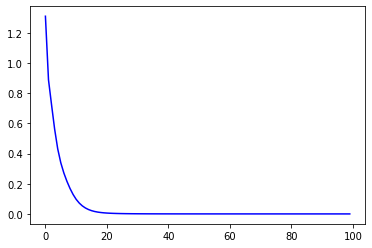

In [ ]:
plt.plot(history.history["loss"],'b')
modelo.evaluate(Xtrain, Ytrain)

In [ ]:
# Load  dataset
# Aqui se cargan los datos de Validación

RutaFile="/content/gdrive/MyDrive/Datos_Secuenciales/audios/gatoTest.318e0dcv.wav"
waveTest1 = load_wav_16k_mono(RutaFile)
espectrogramaT1= preprocess(waveTest1)

RutaFile="/content/gdrive/MyDrive/Datos_Secuenciales/audios/patoTest.318dmkuc.wav"
waveT2 = load_wav_16k_mono(RutaFile)
espectrogramaT2= preprocess(waveT2)

RutaFile="/content/gdrive/MyDrive/Datos_Secuenciales/audios/perroTest.318dc7j7.wav"
waveT3 = load_wav_16k_mono(RutaFile)
espectrogramaT3= preprocess(waveT3)

DatosTest=np.zeros((3,249,129))
DatosTest[0,:,:]=espectrogramaT1
DatosTest[1,:,:]=espectrogramaT2
DatosTest[2,:,:]=espectrogramaT3

print(DatosTest.shape)
Xval=tf.expand_dims(DatosTest, axis=3)
print(Xval.shape)

(3, 249, 129)
(3, 249, 129, 1)


In [ ]:
Yval=np.zeros((3,1))
for i in range(1):
    Yval[i]=0

for i in range(1,2):
    Yval[i]=1

for i in range(2,3):
    Yval[i]=2

print(Yval)

[[0.]
 [1.]
 [2.]]


In [ ]:
Yvalc= to_categorical(Yval)
print(Yvalc)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
modelo.evaluate(Xval, Yvalc)

1/1 [==============================] - 0s 33ms/step - loss: 4.2629 - accuracy: 0.6667


[4.26291036605835, 0.6666666865348816]

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3

[[1 0 0]
 [1 0 0]
 [0 0 1]]


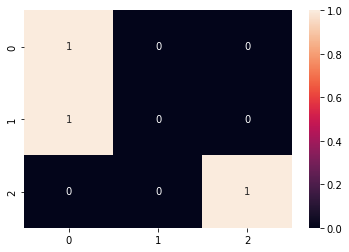

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

ypredic=modelo.predict(Xval)

y_test_class = np.argmax(Yvalc,axis=1) 
y_pred_class = np.argmax(ypredic,axis=1) 

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")